<a href="https://colab.research.google.com/github/aroka007/Data-mining/blob/master/Project000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sea

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d kmader/rsna-bone-age

100% 9.28G/9.29G [02:26<00:00, 64.8MB/s]
100% 9.29G/9.29G [02:26<00:00, 68.0MB/s]


In [ ]:
!unzip rsna-bone-age.zip

##Exploratory Data Analysis


In [8]:
train_df= pd.read_csv("/content/boneage-training-dataset.csv")
print("Glimpse")
print(train_df.head())

#Check Missing values:#
print("\n")
print("Check missing values")
pd.DataFrame(train_df.isnull().sum(), columns=["NA's"])
#No missing values

Glimpse
     id  boneage   male
0  1377      180  False
1  1378       12  False
2  1379       94  False
3  1380      120   True
4  1381       82  False


Check missing values


,NA's
id,0
boneage,0
male,0


In [9]:
train_df["gender"]= train_df["male"].apply(lambda x:"male" if x else "female")
print(train_df.head())

     id  boneage   male  gender
0  1377      180  False  female
1  1378       12  False  female
2  1379       94  False  female
3  1380      120   True    male
4  1381       82  False  female


                 id       boneage
count  12611.000000  12611.000000
mean    8537.653001    127.320752
std     4108.763993     41.182021
min     1377.000000      1.000000
25%     5074.500000     96.000000
50%     8565.000000    132.000000
75%    12091.500000    156.000000
max    15610.000000    228.000000




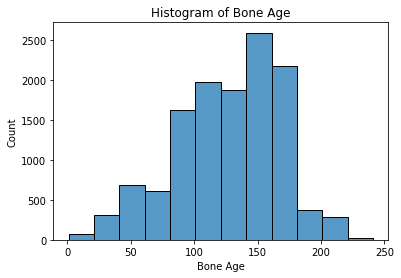

In [17]:
print("Summary")
print(train_df.describe())

sea.histplot(data=train_df["boneage"],binwidth=20)

print("\n")
plt.xlabel("Bone Age")
plt.title('Histogram of Bone Age')
plt.show()


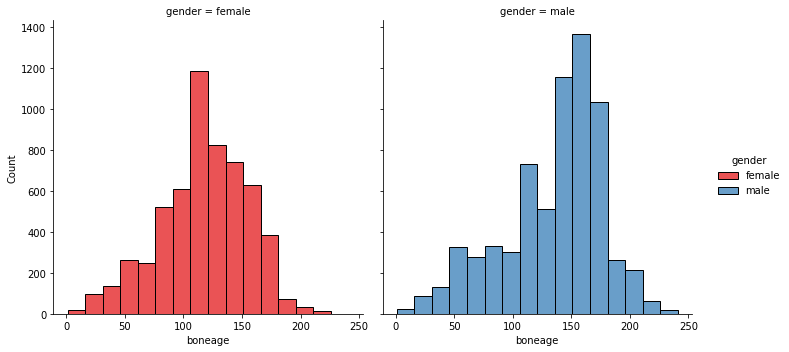

In [10]:
#Per gender group hist()
sea.displot(train_df, x="boneage", col="gender", multiple="dodge", hue="gender",binwidth=15,palette="Set1")
plt.show()


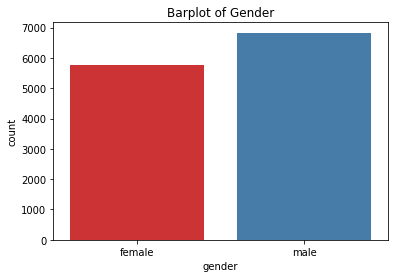

In [11]:
sea.countplot(x="gender",data=train_df, palette="Set1")
plt.title("Barplot of Gender")
plt.show()

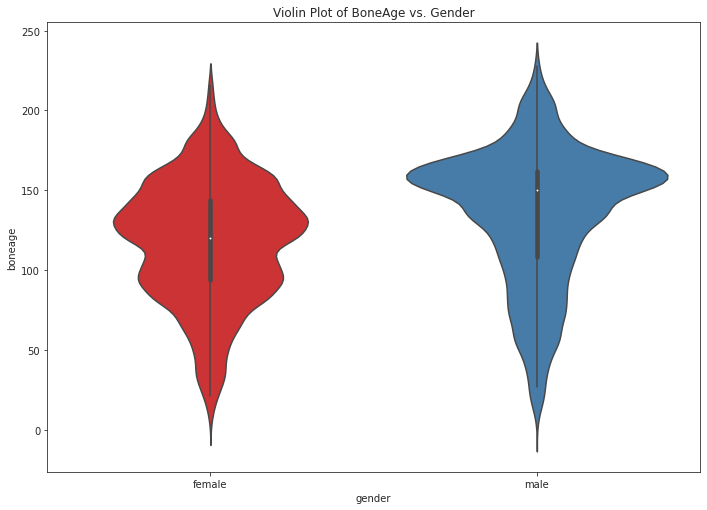

In [12]:
sea.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sea.violinplot(x='gender', y='boneage', data=train_df, kind="box", palette="Set1",ax=ax)
plt.title("Violin Plot of BoneAge vs. Gender")
plt.show()